<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Build-an-unregularized-neural-network-model" data-toc-modified-id="Build-an-unregularized-neural-network-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Build an unregularized neural network model</a></span></li><li><span><a href="#Adding-L2-regularization-and-Dropout" data-toc-modified-id="Adding-L2-regularization-and-Dropout-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Adding L2 regularization and Dropout</a></span></li></ul></div>

Regularization is a technique to combat the overfitting issue in machine learning. Overfitting, also known as High Variance, refers to a model that learns the training data too well but fail to generalize to new data. For example, the green line below is an overfitted model and the black line represents a regularized model.
![](./i/1_6sULF9_kRtcWpkh955MzIA.png)

Overfitting can be diagnosed by plotting training and validation loss. For example, in the below graph, training error is shown in blue, validation error in red, both as a function of the number of training epochs. If the validation error increases while the training error steadily decreases, then a situation of overfitting may have occurred.

![](./i/![1Jw18TckYxqV8wp4fzv7c7g.png)
Once overfitting is diagnosed, it is time to try different regularization techniques and parameters to see if they help. The most widely used regularization techniques are:

    L1 regularization adds “absolute value of magnitude” as penalty term to the loss function. Some people say L1 can help with compressing the model. But in practice, L1 regularization makes your model sparse, helps only a little bit. L2 regularization is just used much more often.
    
    L2 regularization (also known as weight decay) adds “squared magnitude” as penalty term to the loss function and it is used much more often than L1.
    Dropout is widely used regularization technique in deep learning. It randomly shuts down some neurons in each iteration.
    
    Data Augmentation adds extra fake training data. More training also helps with reducing overfitting.
    
    Early Stopping is another widely used regularization technique in deep learning. It stops training when generalization error increases.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

# For the purpose of exploring data, let’s load data into a DataFrame

# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

df.head()

# We notice the label column is a categorical feature and will need to convert it
# to one-hot encoding. Otherwise, our machine learning algorithm won’t be able 
# to directly take in that as input.

# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [3]:
# Creating X and yX = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
# 'petal width (cm)']]
# Convert DataFrame into np array
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [4]:
# Finally, let’s split the dataset into a training set (80%)and a test set 
# (20%) using train_test_split() from sklearn library.

X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


# Build an unregularized neural network model

Before applying regularization, let’s build a neural network without regularization and take a look at the overfitting issue.

There are 3 ways to create a machine learning model with Keras and Tensorflow 2. Since we are building a simple fully connected Neural Network and for simplicity, let’s use the easiest way: Sequential Model with Sequential().

Let’s go ahead and create a function called create_model() to return a Sequential model.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model



Notices that

    The first layer (also known as the input layer) has the input_shape to set the input size (4,)
    The input layer has 64 units, followed by 3 dense layers, each with 128 units. Then there are further 3 dense layers, each with 64 units. All these layers use the ReLU activation function.
    The output Dense layer has 3 units and the softmax activation function.

In [6]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4

In order to train a model, we first have to configure our model using compile() and pass the following arguments:

    Use Adam (adam) optimization algorithm as the optimizer
    Use categorical cross-entropy loss function (categorical_crossentropy) for our multiple-class classification problem
    For simplicity, use accuracy as our evaluation metrics to evaluate the model during training and testing.

In [7]:
# Compile the model

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
# Fit the model to the training data
# 

history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Train on 90 samples, validate on 30 samples
Epoch 1/200
90/90 - 1s - loss: 1.0698 - accuracy: 0.2778 - val_loss: 0.9860 - val_accuracy: 0.9333
Epoch 2/200
90/90 - 0s - loss: 0.9762 - accuracy: 0.7889 - val_loss: 0.8871 - val_accuracy: 0.7333
Epoch 3/200
90/90 - 0s - loss: 0.8933 - accuracy: 0.6556 - val_loss: 0.7844 - val_accuracy: 0.7333
Epoch 4/200
90/90 - 0s - loss: 0.7898 - accuracy: 0.7778 - val_loss: 0.6679 - val_accuracy: 0.8667
Epoch 5/200
90/90 - 0s - loss: 0.6470 - accuracy: 0.7444 - val_loss: 0.5410 - val_accuracy: 0.9333
Epoch 6/200
90/90 - 0s - loss: 0.4993 - accuracy: 0.9333 - val_loss: 0.4444 - val_accuracy: 0.9333
Epoch 7/200
90/90 - 0s - loss: 0.3719 - accuracy: 0.9444 - val_loss: 0.3836 - val_accuracy: 0.7667
Epoch 8/200
90/90 - 0s - loss: 0.3921 - accuracy: 0.7444 - val_loss: 0.4126 - val_accuracy: 0.7667
Epoch 9/200
90/90 - 0s - loss: 0.3050 - accuracy: 0.8667 - val_loss: 0.2508 - val_accuracy: 0.9333
Epoch 10/200
90/90 - 0s - loss: 0.2198 - accuracy: 0.9444 - val_l

Epoch 83/200
90/90 - 0s - loss: 0.0735 - accuracy: 0.9778 - val_loss: 0.1432 - val_accuracy: 0.9667
Epoch 84/200
90/90 - 0s - loss: 0.0654 - accuracy: 0.9778 - val_loss: 0.1493 - val_accuracy: 0.9667
Epoch 85/200
90/90 - 0s - loss: 0.0753 - accuracy: 0.9667 - val_loss: 0.1504 - val_accuracy: 0.9667
Epoch 86/200
90/90 - 0s - loss: 0.0546 - accuracy: 0.9889 - val_loss: 0.1624 - val_accuracy: 0.9667
Epoch 87/200
90/90 - 0s - loss: 0.0571 - accuracy: 0.9889 - val_loss: 0.1558 - val_accuracy: 0.9667
Epoch 88/200
90/90 - 0s - loss: 0.0492 - accuracy: 0.9778 - val_loss: 0.1569 - val_accuracy: 0.9667
Epoch 89/200
90/90 - 0s - loss: 0.0606 - accuracy: 0.9667 - val_loss: 0.1590 - val_accuracy: 0.9667
Epoch 90/200
90/90 - 0s - loss: 0.0525 - accuracy: 0.9667 - val_loss: 0.1773 - val_accuracy: 0.9667
Epoch 91/200
90/90 - 0s - loss: 0.0652 - accuracy: 0.9667 - val_loss: 0.2278 - val_accuracy: 0.8667
Epoch 92/200
90/90 - 0s - loss: 0.0808 - accuracy: 0.9556 - val_loss: 0.1661 - val_accuracy: 0.9667


Epoch 165/200
90/90 - 0s - loss: 0.0583 - accuracy: 0.9556 - val_loss: 0.1705 - val_accuracy: 0.9667
Epoch 166/200
90/90 - 0s - loss: 0.0313 - accuracy: 0.9889 - val_loss: 0.2014 - val_accuracy: 0.9333
Epoch 167/200
90/90 - 0s - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.1666 - val_accuracy: 0.9667
Epoch 168/200
90/90 - 0s - loss: 0.0460 - accuracy: 0.9778 - val_loss: 0.1648 - val_accuracy: 0.9667
Epoch 169/200
90/90 - 0s - loss: 0.0480 - accuracy: 0.9778 - val_loss: 0.1771 - val_accuracy: 0.9667
Epoch 170/200
90/90 - 0s - loss: 0.0418 - accuracy: 0.9778 - val_loss: 0.3204 - val_accuracy: 0.8667
Epoch 171/200
90/90 - 0s - loss: 0.0825 - accuracy: 0.9556 - val_loss: 0.1650 - val_accuracy: 0.9667
Epoch 172/200
90/90 - 0s - loss: 0.0596 - accuracy: 0.9778 - val_loss: 0.1793 - val_accuracy: 0.9667
Epoch 173/200
90/90 - 0s - loss: 0.0877 - accuracy: 0.9667 - val_loss: 0.1654 - val_accuracy: 0.9667
Epoch 174/200
90/90 - 0s - loss: 0.0475 - accuracy: 0.9778 - val_loss: 0.2206 - val_accurac

Once training is complete, it’s time to see if the model is any good with Model Evaluation. The Model Evaluation typically involves

    Plot the progress on loss and accuracy metrics
    Test our model against data that has never been used for training. This is where the test dataset X_test that we set aside earlier come to play.

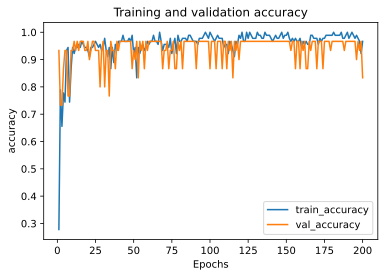

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(history, 'accuracy')


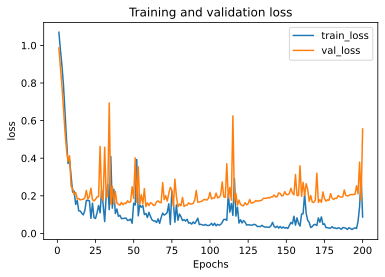

In [9]:
plot_metric(history, 'loss')

From the above graph, we can see that the model has overfitted the training data, so it outperforms the validation set.

In [10]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

30/1 - 0s - loss: 0.0150 - accuracy: 1.0000


[0.01500491239130497, 1.0]

# Adding L2 regularization and Dropout


Then, we create a function called create_regularized_model() and it will return a model similar to the one we built before. But, this time we will add L2 regularization and Dropout layers, so this function takes 2 arguments: a L2 regularization factor and a Dropout rate.

    Let’s add L2 regularization in all layers except the output layer [1].
    Let’s add Dropout layer between every two dense layers.

In [11]:

from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

def create_regularized_model(factor, rate):
    model = Sequential([
        Dense(64, kernel_regularizer=l2(factor), activation="relu", input_shape=(4,)),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(3, activation='softmax')
    ])
    return model

# Re-build the model with weight decay and dropout layers
model = create_regularized_model(1e-5, 0.3)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                320       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

In [12]:
# Compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# Train the model, with some of the data reserved for validation
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Train on 90 samples, validate on 30 samples
Epoch 1/200
90/90 - 1s - loss: 1.1623 - accuracy: 0.2556 - val_loss: 1.0796 - val_accuracy: 0.2667
Epoch 2/200
90/90 - 0s - loss: 1.1057 - accuracy: 0.3778 - val_loss: 1.0825 - val_accuracy: 0.2667
Epoch 3/200
90/90 - 0s - loss: 1.0622 - accuracy: 0.4111 - val_loss: 1.0770 - val_accuracy: 0.2667
Epoch 4/200
90/90 - 0s - loss: 1.1156 - accuracy: 0.3333 - val_loss: 1.0642 - val_accuracy: 0.2667
Epoch 5/200
90/90 - 0s - loss: 1.0797 - accuracy: 0.4000 - val_loss: 1.0580 - val_accuracy: 0.2667
Epoch 6/200
90/90 - 0s - loss: 1.1238 - accuracy: 0.3333 - val_loss: 1.0480 - val_accuracy: 0.3667
Epoch 7/200
90/90 - 0s - loss: 1.1276 - accuracy: 0.2667 - val_loss: 1.0408 - val_accuracy: 0.7333
Epoch 8/200
90/90 - 0s - loss: 1.0952 - accuracy: 0.3444 - val_loss: 1.0358 - val_accuracy: 0.7333
Epoch 9/200
90/90 - 0s - loss: 1.0721 - accuracy: 0.3889 - val_loss: 1.0227 - val_accuracy: 0.7333
Epoch 10/200
90/90 - 0s - loss: 1.0899 - accuracy: 0.3444 - val_l

Epoch 83/200
90/90 - 0s - loss: 0.4469 - accuracy: 0.8000 - val_loss: 0.4818 - val_accuracy: 0.9667
Epoch 84/200
90/90 - 0s - loss: 0.4231 - accuracy: 0.7556 - val_loss: 0.4706 - val_accuracy: 0.9333
Epoch 85/200
90/90 - 0s - loss: 0.4859 - accuracy: 0.6889 - val_loss: 0.4662 - val_accuracy: 0.9333
Epoch 86/200
90/90 - 0s - loss: 0.4647 - accuracy: 0.7222 - val_loss: 0.4636 - val_accuracy: 0.9000
Epoch 87/200
90/90 - 0s - loss: 0.4516 - accuracy: 0.7667 - val_loss: 0.4633 - val_accuracy: 0.9333
Epoch 88/200
90/90 - 0s - loss: 0.4980 - accuracy: 0.7000 - val_loss: 0.4734 - val_accuracy: 0.9667
Epoch 89/200
90/90 - 0s - loss: 0.4400 - accuracy: 0.7889 - val_loss: 0.4792 - val_accuracy: 0.9333
Epoch 90/200
90/90 - 0s - loss: 0.4305 - accuracy: 0.7889 - val_loss: 0.4750 - val_accuracy: 0.9667
Epoch 91/200
90/90 - 0s - loss: 0.4737 - accuracy: 0.7000 - val_loss: 0.4727 - val_accuracy: 0.9667
Epoch 92/200
90/90 - 0s - loss: 0.4397 - accuracy: 0.8111 - val_loss: 0.4680 - val_accuracy: 0.9667


Epoch 165/200
90/90 - 0s - loss: 0.1952 - accuracy: 0.9000 - val_loss: 0.1522 - val_accuracy: 0.9333
Epoch 166/200
90/90 - 0s - loss: 0.2052 - accuracy: 0.9556 - val_loss: 0.1637 - val_accuracy: 0.9333
Epoch 167/200
90/90 - 0s - loss: 0.1728 - accuracy: 0.9444 - val_loss: 0.1377 - val_accuracy: 0.9667
Epoch 168/200
90/90 - 0s - loss: 0.2415 - accuracy: 0.8889 - val_loss: 0.1784 - val_accuracy: 0.9333
Epoch 169/200
90/90 - 0s - loss: 0.2843 - accuracy: 0.9000 - val_loss: 0.2016 - val_accuracy: 0.9333
Epoch 170/200
90/90 - 0s - loss: 0.2689 - accuracy: 0.8778 - val_loss: 0.1579 - val_accuracy: 0.9333
Epoch 171/200
90/90 - 0s - loss: 0.2446 - accuracy: 0.8889 - val_loss: 0.1937 - val_accuracy: 0.9333
Epoch 172/200
90/90 - 0s - loss: 0.2328 - accuracy: 0.9000 - val_loss: 0.2898 - val_accuracy: 0.8333
Epoch 173/200
90/90 - 0s - loss: 0.2550 - accuracy: 0.9111 - val_loss: 0.2131 - val_accuracy: 0.9333
Epoch 174/200
90/90 - 0s - loss: 0.1727 - accuracy: 0.9667 - val_loss: 0.1885 - val_accurac

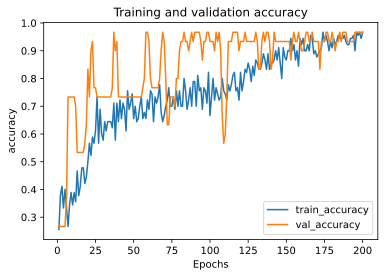

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(history, 'accuracy')


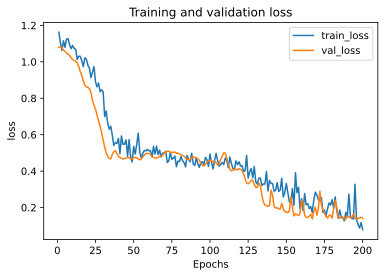

In [14]:
plot_metric(history, 'loss')


In [15]:
"DONE"

'DONE'